# Homework 3

The following code show which packages are used and which cvs files have been downloaded. 

In [138]:
df_one <- read.csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/IRIS.csv")
df_two <- read.csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/artportalen.csv")
df_three <- read.csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv")
df_four <- read.csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/cell_phones_total.csv")
library(zoo)
library(dplyr)
library(ggplot2)
library(gridExtra)

## Exploratory Data Analysis
### IRIS data

In the file IRIS.csv, we find data on three species of iris flowers. The data contains information about the dimensions of various aspects of the flowers.

We have generated the following plots to explore whether there is a relationship between sepal dimensions and petal dimensions.

The first plot visualizes the relationship between the sepal length and petal length of different species of iris flowers in the dataset df_one. The x-axis represents the sepal length of the flowers, while the y-axis represents the petal length of the flowers. Each point in the plot corresponds to an individual flower. The red points represent Iris-setosa, the green points represent Iris-versicolor, and the blue points represent Iris-virginica.

The plot shows that the Iris-setosa points are concentrated in the bottom-left corner. This indicates that Iris-setosa has small sepal lengths and petal lengths, and this pattern holds for all the observations of Iris-setosa. Meanwhile, the Iris-versicolor points are primarily in the mid-range, with the highest concentration slightly toward the upper-middle of the plot. This could suggest that Iris-versicolor generally has moderate sepal and petal dimensions, though the points are more spread out compared to Iris-setosa. Finally, the Iris-virginica points are positioned more toward the higher end of both the sepal length and petal length axes, particularly in the upper-right corner of the plot. Although these points are more spread out than those of the other flowers, you could still conclude that Iris-virginica has larger petal and sepal lengths compared to the other two species.

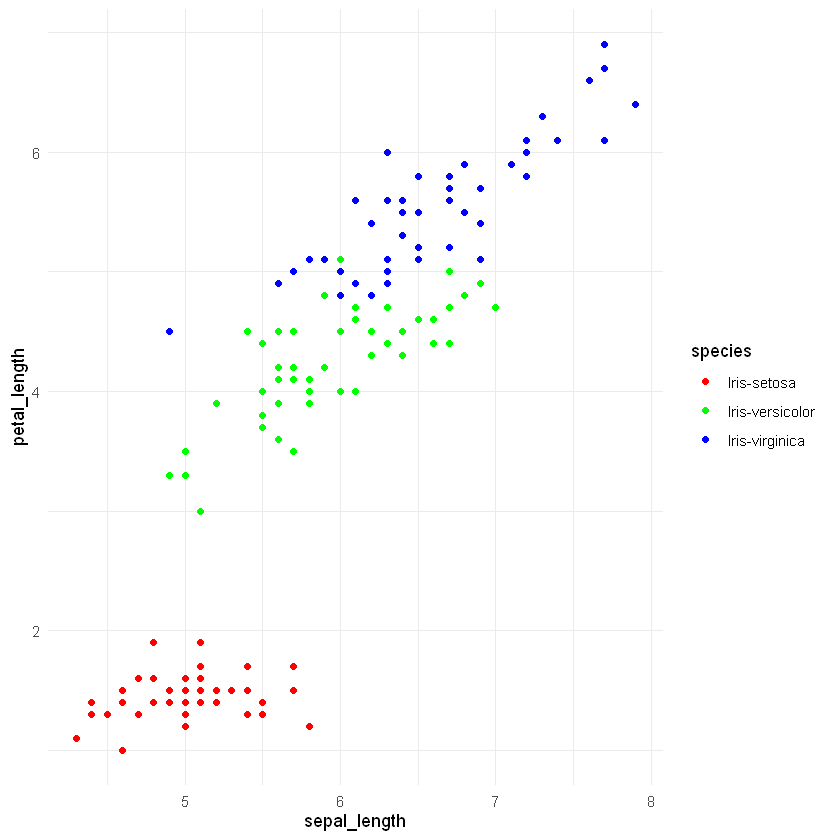

In [188]:
ggplot(df_one, aes(x = sepal_length, y = petal_length, color = species)) +
  geom_point() +
  labs(x = "sepal_length", y = "petal_length") +
  theme_minimal() +
  scale_color_manual(values = c("Iris-setosa" = "red", "Iris-versicolor" = "green", "Iris-virginica" = "blue"))

The second plot below has a similar structure to the previous one, except that this plot visualizes the relationship between the sepal width and petal width.

In this plot, we have set the x-axis to represent the sepal width of the flowers and the y-axis to represent the petal width of the flowers. Again, each point in the plot corresponds to an individual flower. The red points represent Iris-setosa, the green points represent Iris-versicolor, and the blue points represent Iris-virginica.

The plot shows a similar pattern to the previous one, but the noticeable difference is that the Iris-setosa points are concentrated in the bottom-right corner. This indicates that Iris-setosa has relatively large sepal widths and small petal widths. The Iris-versicolor points are again in the middle range, but they lean more toward the left side of the plot. This suggests that Iris-versicolor has moderate sepal and petal dimensions, but with slightly smaller sepal widths. The Iris-virginica points are found more toward the higher end of the plot, but they are slightly shifted toward the left side. This indicates that they don’t have as large a sepal width as Iris-setosa, but they do have larger petal widths compared to both Iris-setosa and Iris-versicolor.

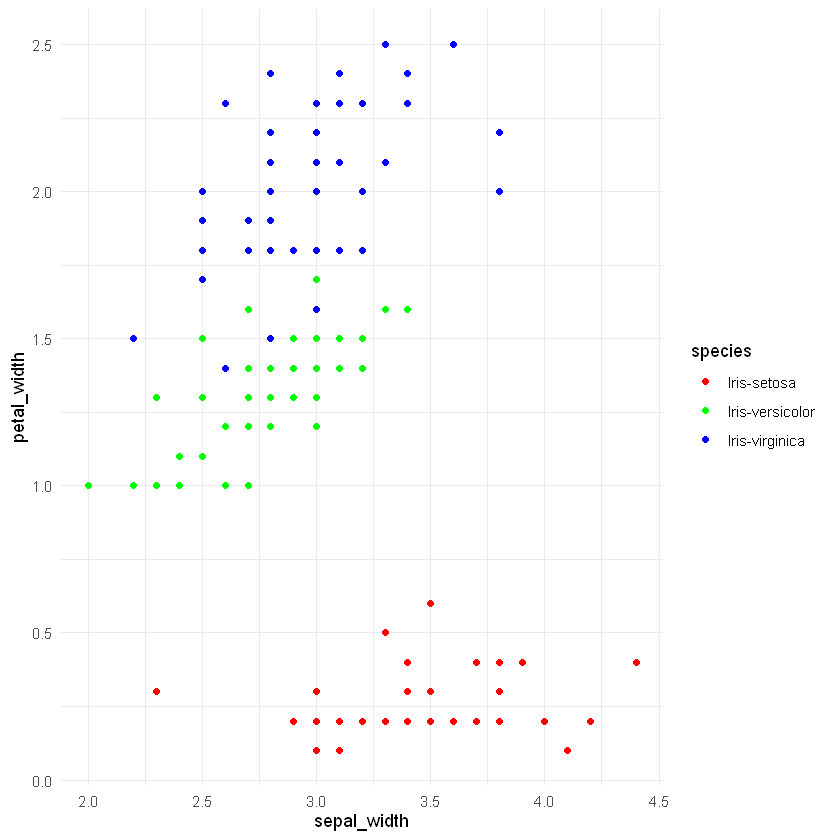

In [209]:
ggplot(df_one, aes(x = sepal_width, y = petal_width, color = species)) +
  geom_point() +
  labs(x = "sepal_width", y = "petal_width") +
  theme_minimal() +
  scale_color_manual(values = c("Iris-setosa" = "red", "Iris-versicolor" = "green", "Iris-virginica" = "blue"))

We have created some boxplots to answer the question of how the sepal and petal dimensions are distributed. We have done so by generating four different plots: "Sepal Width by Species", "Sepal Length by Species", "Petal Width by Species", and "Petal Length by Species" to better understand the data. We have used the same corresponding colors as before in all the plots below. 

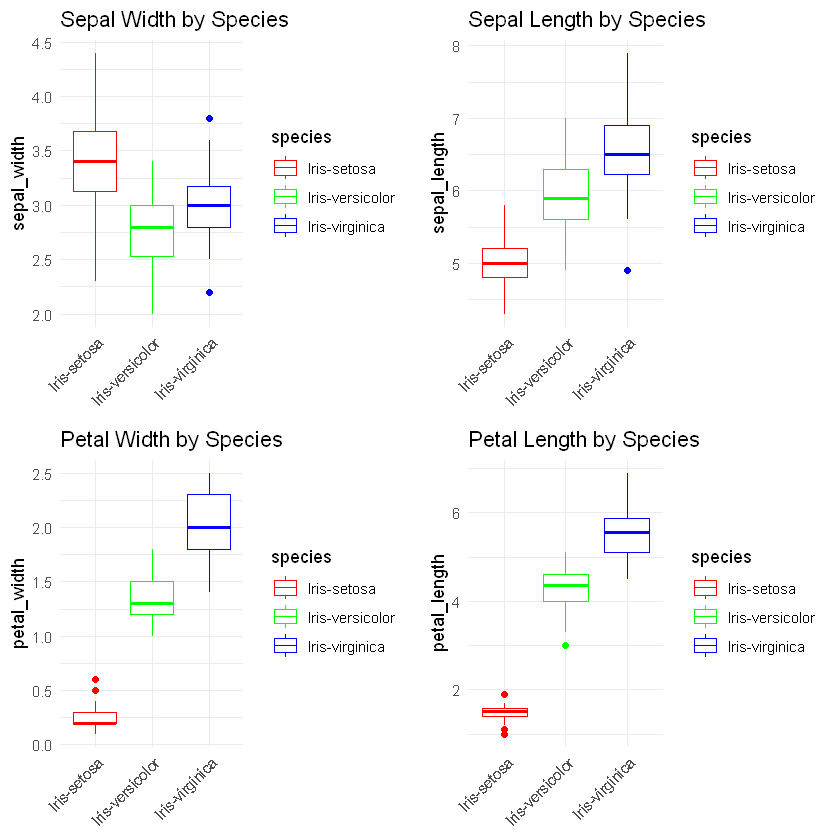

In [210]:
plot1 <- ggplot(df_one, aes(x = species, y = sepal_width, color = species)) +
  geom_boxplot() +
  labs(title = "Sepal Width by Species", x = "species", y = "sepal_width") +
  theme_minimal() +
  scale_color_manual(values = c("Iris-setosa" = "red", "Iris-versicolor" = "green", "Iris-virginica" = "blue")) +
  theme(axis.title.x = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1))

plot2 <- ggplot(df_one, aes(x = species, y = sepal_length, color = species)) +
  geom_boxplot() +
  labs(title = "Sepal Length by Species", x = "species", y = "sepal_length") +
  theme_minimal() +
  scale_color_manual(values = c("Iris-setosa" = "red", "Iris-versicolor" = "green", "Iris-virginica" = "blue")) +
  theme(axis.title.x = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1))

plot3 <- ggplot(df_one, aes(x = species, y = petal_width, color = species)) +
  geom_boxplot() +
  labs(title = "Petal Width by Species", x = "species", y = "petal_width") +
  theme_minimal() +
  scale_color_manual(values = c("Iris-setosa" = "red", "Iris-versicolor" = "green", "Iris-virginica" = "blue")) +
  theme(axis.title.x = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1))

plot4 <- ggplot(df_one, aes(x = species, y = petal_length, color = species)) +
  geom_boxplot() +
  labs(title = "Petal Length by Species", x = "species", y = "petal_length") +
  theme_minimal() +
  scale_color_manual(values = c("Iris-setosa" = "red", "Iris-versicolor" = "green", "Iris-virginica" = "blue")) +
  theme(axis.title.x = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1))

grid.arrange(plot1, plot2, plot3, plot4, ncol = 2)

### Birdwatching

In the file artportalen.csv, we will find data on bird sightings made in 2022 in the Royal National Park.

To analyze the data and answer the question of which species are the most prevalent, we have created the following code. This code creates a table that shows the species name and how many of them were counted. It accomplishes this by converting the sightings (Antal) column to numeric. It then removes the rows with missing data and sums the sightings for each species (Artnamn). We have also sorted it so that the table only shows the species in descending order. This allows us to determine which species have the highest prevalence based on sightings.

The table shows that the most prevalent species based on the total number of sightings are Grönsiska, Sothöna, Gräsand, Storskrake, Vitkindad gås, and Storskarv.

In [204]:
df_two$Antal <- as.numeric(df_two$Antal)  

df_two_cleaned <- df_two[!is.na(df_two$Antal), c("Artnamn", "Antal")]

species_sightings_grouped <- aggregate(Antal ~ Artnamn, data = df_two_cleaned, sum)

species_sightings_grouped_sorted <- species_sightings_grouped[order(species_sightings_grouped$Antal, decreasing = TRUE), ]

head(species_sightings_grouped_sorted)

,Artnamn,Antal
,<chr>,<dbl>
43,Grönsiska,20211
120,Sothöna,8308
39,Gräsand,7167
132,Storskrake,6750
168,Vitkindad gås,6345
131,Storskarv,5281


To find out the monthly distribution of the top three most prevalent species, we have created the following code. The code selects the top 3 species from the previous question. Then, it filters the dataset to include only these top species. The date of sighting (Startdatum) is converted to a proper date format, and a new YearMonth column is created to group the sightings by month. The code then calculates the total sightings for each species per month. It visualizes the monthly distribution of sightings for the top 3 species. The x-axis shows the months, the y-axis shows the total sightings, and different colors represent each species.

From the visualized data, we can see that the Grönsiska species had the highest number of sightings, especially in January, where it peaked at nearly 2000 sightings. However, in the months after, the sightings of Grönsiska declined rapidly, with most months having fewer than 175 sightings. The Sothöna species showed the highest concentration of sightings in March but had fewer sightings in other months. Finally, the Gräsand was seen most frequently from Januari to March, but its sightings were still relatively low, and gradually decreased after March.

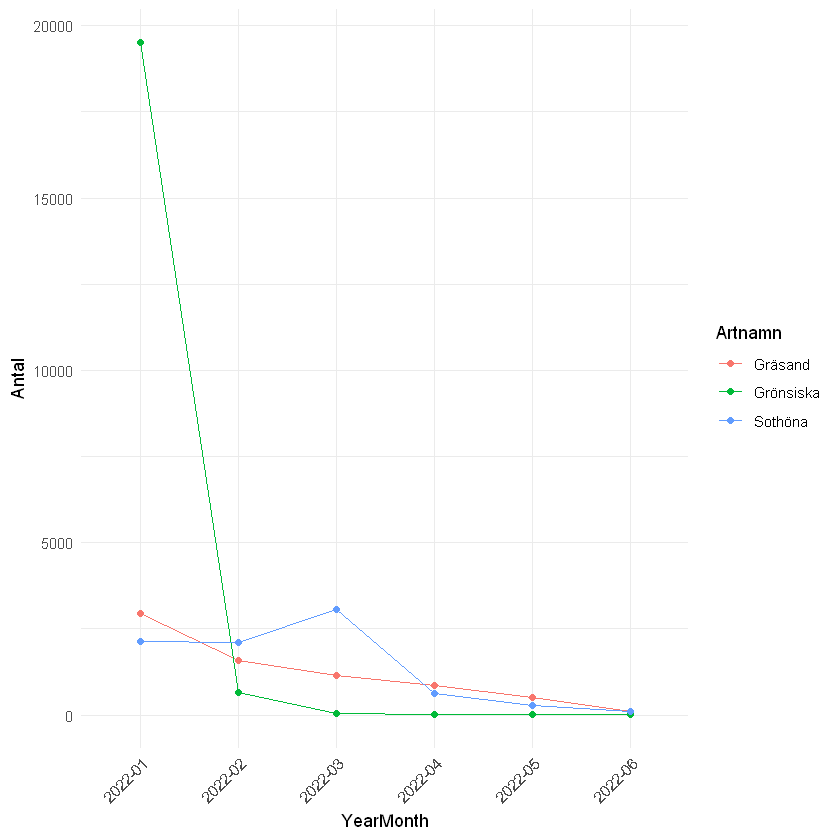

In [205]:
top_3_species <- species_sightings_grouped_sorted$Artnamn[1:3]

top_species_data <- df_two[df_two$Artnamn %in% top_3_species, ]

top_species_data$Startdatum <- as.Date(top_species_data$Startdatum, format="%Y-%m-%d")
top_species_data$YearMonth <- format(top_species_data$Startdatum, "%Y-%m")

monthly_distribution <- aggregate(Antal ~ Artnamn + YearMonth, data = top_species_data, sum)

ggplot(monthly_distribution, aes(x = YearMonth, y = Antal, color = Artnamn, group = Artnamn)) +
  geom_line() +
  geom_point() +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

To find the rarest species, we used the table from the first question and extracted the 10 species with the fewest sightings from the table. We then used the head function to see the top ones. This gave us the following rarest species: Röd glada, Rödbena, Spillkråka, Storlom, Strömstare, and Tornfalk, to only name a few.

In [195]:
rarest_species <- tail(species_sightings_grouped_sorted, 10)
                       
head(rarest_species)

,Artnamn,Antal
,<chr>,<dbl>
98,Röd glada,1
99,Rödbena,1
123,Spillkråka,1
130,Storlom,1
135,Strömstare,1
154,Tornfalk,1


For the remaining questions, we had to come up with something we found interesting. I found the red-listed (Rödlistade) species interesting, since these are the species we must protect.
To analyze the data and identify red-listed species, we have created the following code. This code first converts the Rödlistade column to a factor for proper categorization. Then, it creates a new column, Red_List_Status, to classify species as "Rödlistade" (Red-listed) if they are marked as Endangered, Near Threatened, or Vulnerable. Species without this status are labeled as "Not Rödlistade." Next, the code filters out red-listed species and removes any duplicates, giving us a clean list of species that are considered at risk. This code gave us a table of the species that are red-listed, but I have only included some because of the use of the head function. So we can see these Björktrast, Fiskmås, Gråtrut, Havsörn, Gråkråka and Rödvingetrast species in the table.

In [206]:
df_two$Rödlistade <- as.factor(df_two$Rödlistade)

df_two$Red_List_Status <- ifelse(is.na(df_two$Rödlistade), "NA",  # Handle NA values
                                 ifelse(df_two$Rödlistade %in% c("EN", "NT", "VU"), "Rödlistade", "Not Rödlistade"))

red_listed_species <- df_two[df_two$Red_List_Status == "Rödlistade", c("Artnamn", "Rödlistade")]
red_listed_species_table <- unique(red_listed_species) 
head(red_listed_species_table)

,Artnamn,Rödlistade
,<chr>,<fct>
6,Björktrast,NT
14,Fiskmås,NT
15,Gråtrut,VU
17,Havsörn,NT
23,Gråkråka,NT
29,Rödvingetrast,NT


Since I still wanted to explore the data of the red-listed species, my next question was how many species are Endangered, Near Threatened, and Vulnerable. That is why the following code was made.

The code creates a bar plot to visualize the total sightings of red-listed species, categorized by their threat level—Endangered, Near Threatened, and Vulnerable. It first classifies species based on their red-list status, creating a new column to indicate whether a species is red-listed (with labels like "EN" for Endangered, "NT" for Near Threatened, and "VU" for Vulnerable) or not. The data is then cleaned by removing rows with missing sighting counts. Next, the total sightings for each red-list status are aggregated and filtered to include only the categories of Endangered, Near Threatened, and Vulnerable. Finally, the plot displays the total number of sightings for each of these categories, with each bar color-coded to represent the specific threat level.

The plot shows that most of the red-listed species are NT (Near Threatened), with over 1500 counted sightings. The VU (Vulnerable) species have a bit more than 4500 counted sightings. And lastly, the EN (Endangered) species have just over 1500 counted sightings. This shows that there are many animals in this study that need to be protected.

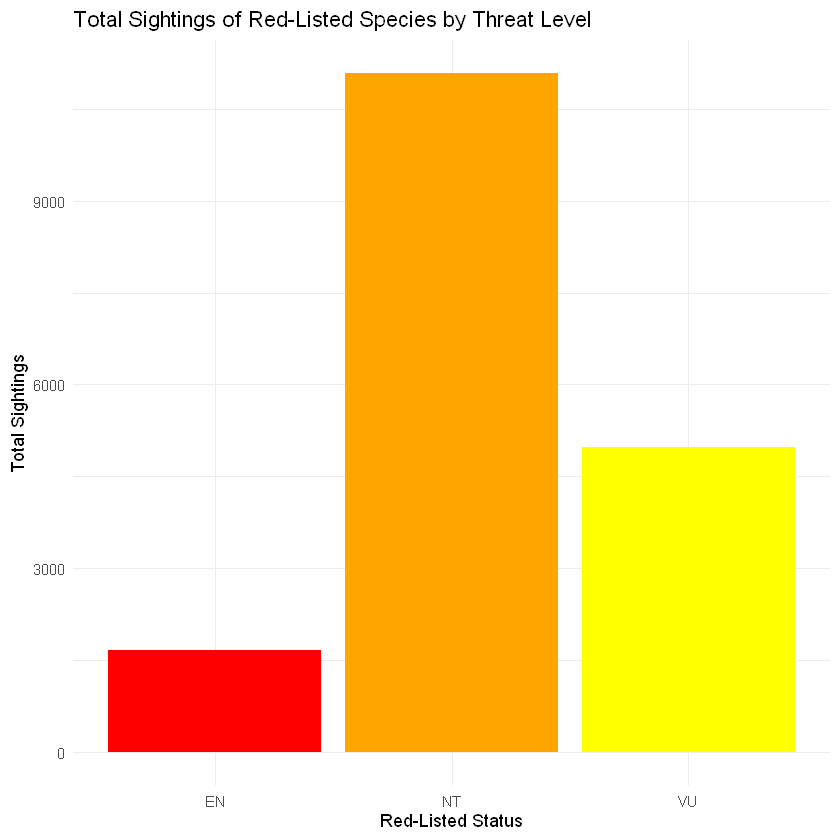

In [207]:
df_two$Rödlistade <- as.factor(df_two$Rödlistade)


df_two$Red_List_Status <- ifelse(is.na(df_two$Rödlistade), "NA",
                                 ifelse(df_two$Rödlistade %in% c("EN", "NT", "VU"), as.character(df_two$Rödlistade), "Not Rödlistade"))

df_two_cleaned <- df_two[!is.na(df_two$Antal), c("Artnamn", "Antal", "Red_List_Status")]

red_listed_sightings <- aggregate(Antal ~ Red_List_Status, data = df_two_cleaned, sum)

red_listed_sightings_filtered <- red_listed_sightings[red_listed_sightings$Red_List_Status %in% c("EN", "NT", "VU"), ]

ggplot(red_listed_sightings_filtered, aes(x = Red_List_Status, y = Antal, fill = Red_List_Status)) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  labs(title = "Total Sightings of Red-Listed Species by Threat Level", 
       x = "Red-Listed Status", 
       y = "Total Sightings") +
  theme_minimal() +
  scale_fill_manual(values = c("red", "orange", "yellow"))  

To further investigate these endangered species, I asked myself if there was any correlation in how many were sighted by different regions. Therefore, the code below analyzes the sightings of red-listed species (Endangered, Near Threatened, and Vulnerable) by different regions (referred to as "Kommun" in the dataset).

First, it classifies species based on their red-list status, creating a new column to mark species as either "Rödlistade" (red-listed) or "Not Rödlistade" (not red-listed). The data is cleaned by removing rows with missing sighting counts. The code then filters the dataset to include only the red-listed species (Endangered, Near Threatened, or Vulnerable). Afterward, it aggregates the total sightings of red-listed species by region and threat level. The resulting data is used to create a bar plot where each bar represents the total sightings of red-listed species in each region, grouped by their threat status. The bars are color-coded based on the red-list status, with different colors indicating Endangered, Near Threatened, or Vulnerable species. 

The plot showed that the Stockholm region had the most total sightings for EN, NT, and VU species by far. The Solna region also had quite a few total sightings for the NT species, but not as many as Stockholm. Sollentuna and Lidingö didn't have as many total sightings as the other regions.

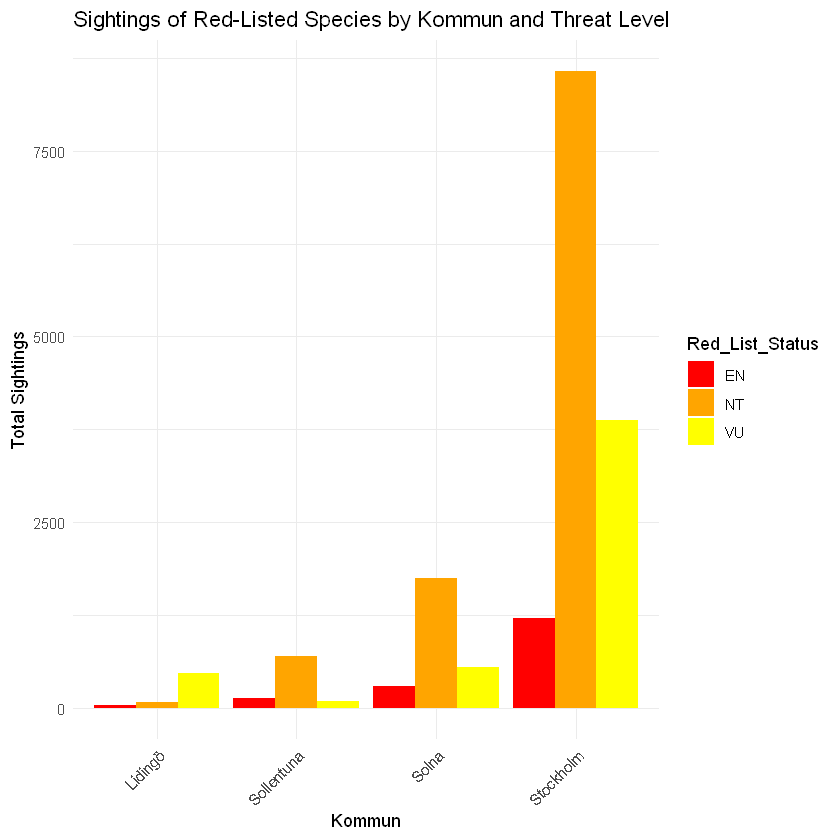

In [197]:
df_two$Rödlistade <- as.factor(df_two$Rödlistade)

df_two$Red_List_Status <- ifelse(is.na(df_two$Rödlistade), "NA",
                                 ifelse(df_two$Rödlistade %in% c("EN", "NT", "VU"), as.character(df_two$Rödlistade), "Not Rödlistade"))

df_two_cleaned <- df_two[!is.na(df_two$Antal), c("Artnamn", "Antal", "Red_List_Status", "Kommun")]

df_filtered <- df_two_cleaned[df_two_cleaned$Red_List_Status %in% c("EN", "NT", "VU"), ]

kommun_sightings <- aggregate(Antal ~ Kommun + Red_List_Status, data = df_filtered, sum)

library(ggplot2)
ggplot(kommun_sightings, aes(x = Kommun, y = Antal, fill = Red_List_Status)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Sightings of Red-Listed Species by Kommun and Threat Level",
       x = "Kommun",
       y = "Total Sightings") +
  theme_minimal() +
  scale_fill_manual(values = c("red", "orange", "yellow")) +  
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) 


### Predicting strokes

In the file stroke-data.csv, we can find data about stroke cases and information about the individuals it pertains to.

We had to come up with some questions ourselves and answer them. When I looked at the dataset and its columns: id, gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status, and stroke, I started to wonder if certain factors, such as ever_married, work_type, and residence_type, could have an effect on the likelihood of having a stroke. This line of inquiry is intriguing because these are factors that can potentially be modified in a person's life. For example, changing lifestyle habits or even living in a different type of environment could impact the chances of having a stroke.

So the first question I asked myself was whether those who were not married had a higher chance of having a stroke. Therefore, the following code was created to visualize the number of stroke cases based on marital status (whether someone has ever been married). It uses a bar chart (geom_bar) with the bars positioned side-by-side (position = "dodge") to compare the counts of individuals who have and have not had a stroke, grouped by their marital status (Ever Married). The colors red and blue represent the stroke and non-stroke groups, respectively.

The second plot shows the proportion of stroke versus non-stroke cases, again based on marital status, but this time the bars are stacked to show the relative distribution of stroke and non-stroke individuals within each marital status category (position = "fill"). The fill color still represents stroke status (red for stroke, blue for no stroke), and the height of the bars is normalized to show proportions rather than raw counts.

What was interesting from these plots is that more people who were married had had strokes. I found this interesting since I had thought that married people might be happier and have a support group by their side, so I just assumed that their stress levels would be lower. But maybe it's the opposite. However, and since the distribution showed a higher percentage of strokes among married people, we could say that there might be a possible correlation between marriage and having a stroke, but I believe that there are so many aspects to account into this so I think that we have to ask more about what in their married life could be the important factors. Is it stress or something else.

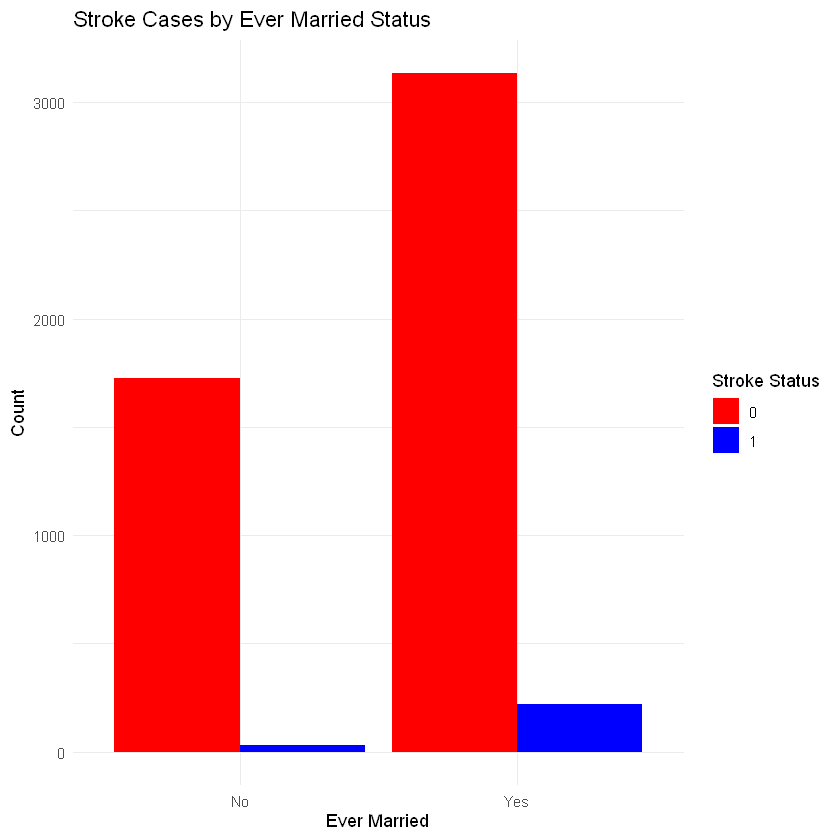

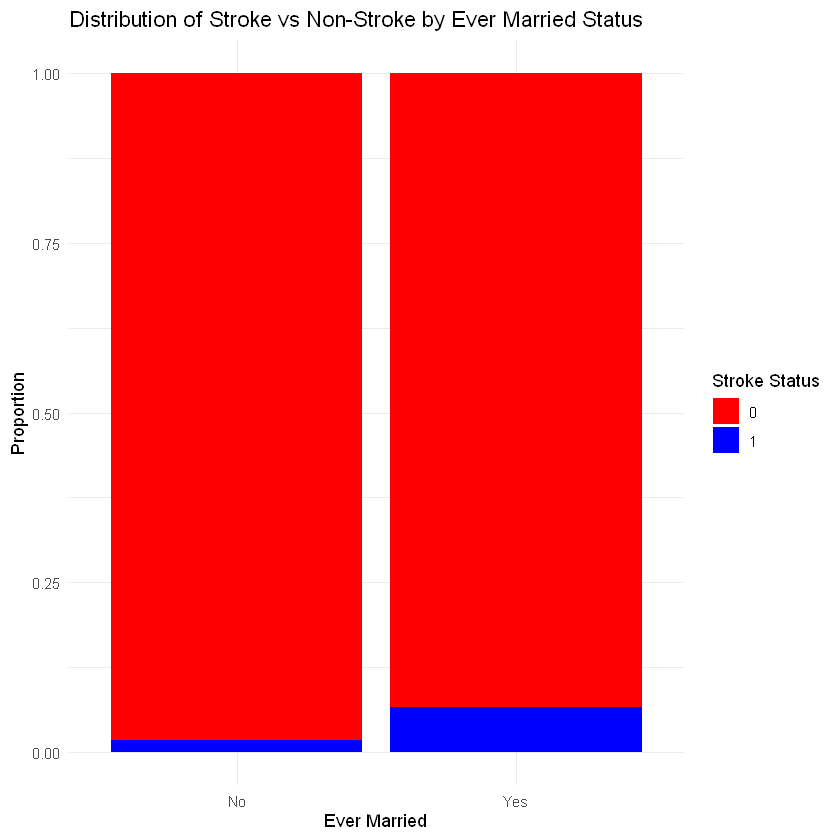

In [198]:
ggplot(df_three, aes(x = ever_married, fill = stroke)) +
  geom_bar(position = "dodge") + 
  labs(title = "Stroke Cases by Ever Married Status",
       x = "Ever Married",
       y = "Count",
       fill = "Stroke Status") +
  scale_fill_manual(values = c("red", "blue")) + 
  theme_minimal()

ggplot(df_three, aes(x = ever_married, fill = stroke)) +
  geom_bar(position = "fill") + 
  labs(title = "Distribution of Stroke vs Non-Stroke by Ever Married Status",
       x = "Ever Married",
       y = "Proportion",
       fill = "Stroke Status") +
  scale_fill_manual(values = c("red", "blue")) +  
  theme_minimal()


In analyzing the dataset, I was curious to explore if there is any correlation between work type and the risk of having a stroke. The first plot shows the count of strokes by work type, where government jobs, private jobs, and self-employment have higher stroke counts. Among these, private jobs had the most strokes, followed by self-employed individuals and government workers. The second plot illustrates the distribution of strokes versus non-strokes by work type, where self-employed individuals had the highest proportion of strokes, followed by those in private jobs, and then government workers.

I found these results quite surprising, as I initially assumed that people who never worked or those working with children might experience more stress or physical exhaustion, leading to a higher risk of strokes. However, it seems that more mentally exhausting jobs, which often carry significant pressure, might play a role in the occurrence of strokes. Based on this, I believe work type could be a contributing factor to stroke risk.

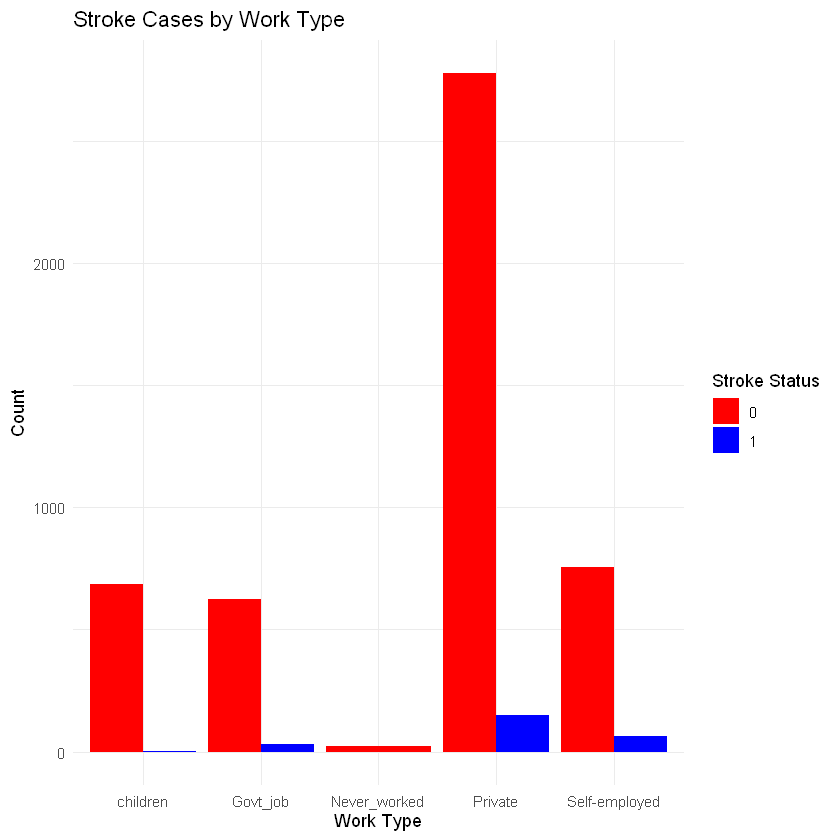

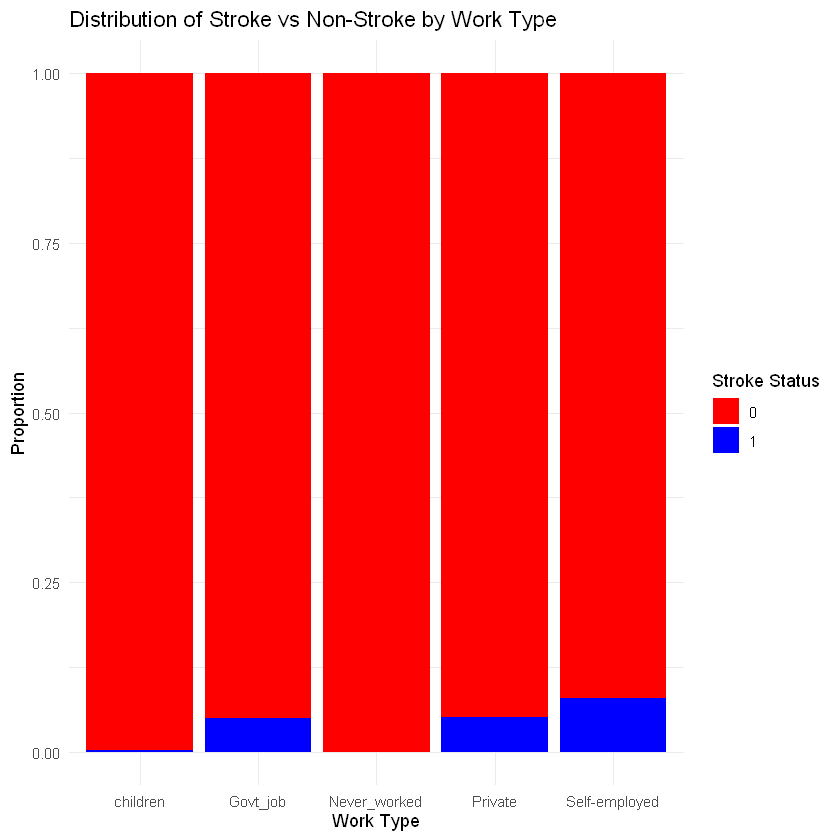

In [199]:
ggplot(df_three, aes(x = work_type, fill = stroke)) +
  geom_bar(position = "dodge") +  
  labs(title = "Stroke Cases by Work Type",
       x = "Work Type",
       y = "Count",
       fill = "Stroke Status") +
  scale_fill_manual(values = c("red", "blue")) + 
  theme_minimal()

ggplot(df_three, aes(x = work_type, fill = stroke)) +
  geom_bar(position = "fill") + 
  labs(title = "Distribution of Stroke vs Non-Stroke by Work Type",
       x = "Work Type",
       y = "Proportion",
       fill = "Stroke Status") +
  scale_fill_manual(values = c("red", "blue")) + 
  theme_minimal()

When analyzing the relationship between residence type and stroke risk, I created two plots to visualize the data. The first plot shows the count of stroke cases by residence type, and the second shows the distribution of strokes versus non-strokes by residence type. Both plots reveal that there is little to no difference in the number of stroke cases between individuals living in urban versus rural areas.

This could suggest that there is no significant correlation between residence type and stroke risk in the dataset. However, it is also possible that the dataset simply doesn't contain enough data to detect a potential pattern. Based on these plots, it is difficult to conclude whether living in a rural or urban area has any influence on stroke occurrence. Therefore, further investigation or more data may be needed to draw meaningful conclusions about this relationship.

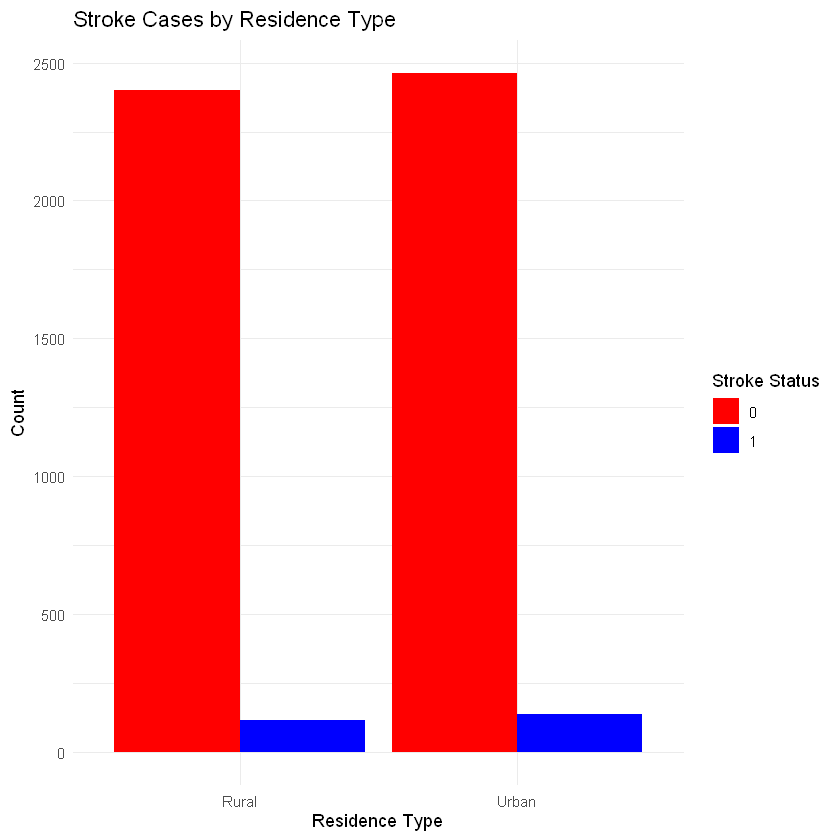

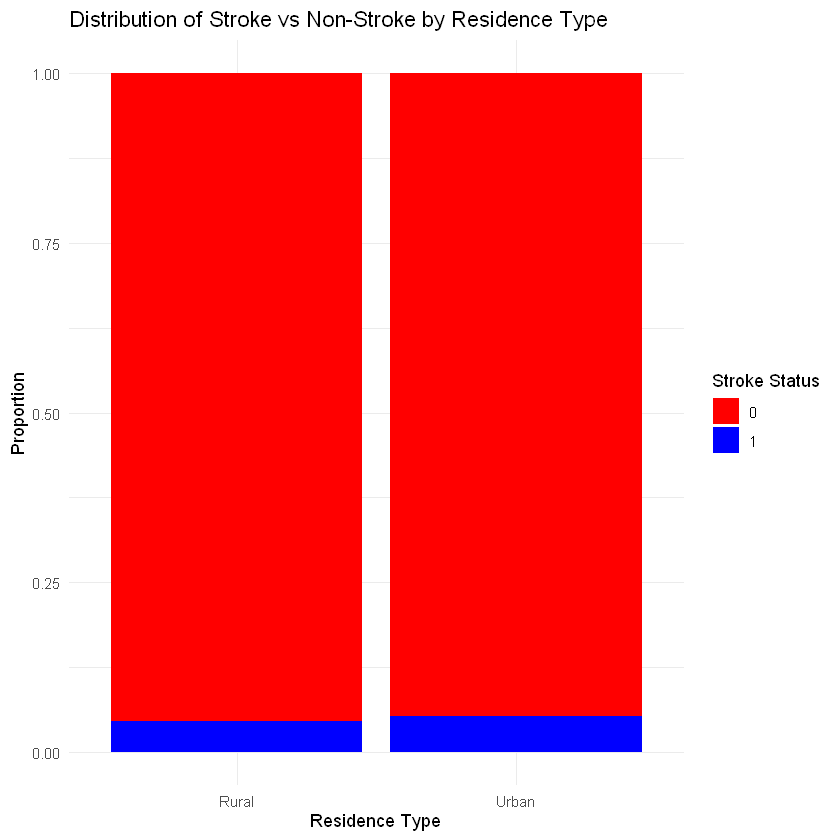

In [200]:
ggplot(df_three, aes(x = Residence_type, fill = stroke)) +
  geom_bar(position = "dodge") +  
  labs(title = "Stroke Cases by Residence Type",
       x = "Residence Type",
       y = "Count",
       fill = "Stroke Status") +
  scale_fill_manual(values = c("red", "blue")) +  
  theme_minimal()

ggplot(df_three, aes(x = Residence_type, fill = stroke)) +
  geom_bar(position = "fill") +  
  labs(title = "Distribution of Stroke vs Non-Stroke by Residence Type",
       x = "Residence Type",
       y = "Proportion",
       fill = "Stroke Status") +
  scale_fill_manual(values = c("red", "blue")) + 
  theme_minimal()

# Data preperation
### Cleaning data

The cell_phones_total.csv file contains data about the number of phones within countries over the years, from 1960 to 2019.

To clean the cell_phones_total.csv dataset, we first handled the missing values by filling or removing them where necessary, depending on the context. Next, we converted the relevant columns, which were originally represented as strings (e.g., with "k" for thousands, "M" for millions, and "B" for billions), into numeric values. This step ensures that all numbers are represented correctly for analysis. After cleaning and transforming the data, we sorted the table by the year 2015, as required.

The final table gave similar values to the ones shown in the question for the year 2015. However, there may be slight differences in the values due to how the missing data was handled during the cleaning process

In [102]:
convert_to_numeric <- function(value) {
  if (is.character(value)) {
    value <- trimws(value)  
    multipliers <- c(k = 1e3, M = 1e6, B = 1e9)
    
    for (suffix in names(multipliers)) {
      if (grepl(suffix, value)) {
        return(as.numeric(gsub(suffix, "", value)) * multipliers[suffix])
      }
    }
    return(as.numeric(value))
  }
  return(value) 
}

df_four[, -1] <- lapply(df_four[, -1], function(x) sapply(x, convert_to_numeric))

# Handle missing values: Forward fill and then fill remaining NA with 0
df_four[] <- lapply(df_four, function(x) na.locf(x, na.rm = FALSE))  # Forward fill
df_four[is.na(df_four)] <- 0  # Replace any remaining NAs with 0

df_four_sorted <- df_four %>%
  arrange(desc(X2015))

cleaned_sample <- df_four_sorted %>%
  select(iso.3, X2015, X2016, X2017, X2018, X2019)

head(cleaned_sample)


,iso.3,X2015,X2016,X2017,X2018,X2019
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CHN,1.29e+09,1.36e+09,1.47e+09,1.65e+09,1.73e+09
2,IND,1.00e+09,1.13e+09,1.17e+09,1.18e+09,1.15e+09
3,USA,3.82e+08,3.96e+08,4.00e+08,4.22e+08,4.78e+06
4,IDN,3.39e+08,3.86e+08,4.35e+08,3.19e+08,3.45e+08
5,BRA,2.58e+08,2.44e+08,2.18e+08,2.07e+08,2.55e+05
6,RUS,2.27e+08,2.29e+08,2.27e+08,2.29e+08,2.40e+08
